In [1]:
import os, sys
print("Current folder:", os.getcwd())
sys.path.insert(0, os.path.abspath(".."))
print("Project root added:", os.path.abspath(".."))

Current folder: /home/jovyan/EEP-153---Project-1/notebooks
Project root added: /home/jovyan/EEP-153---Project-1


In [2]:
from src.indicators import INDICATORS
from src.wb_fetch import fetch_wb_data
from src.panel import build_panel

In [3]:
import os, sys
sys.path.insert(0, os.path.abspath(".."))

from src.indicators import INDICATORS
from src.wb_fetch import fetch_wb_data

countries = ["USA", "BRA", "IND", "NGA", "VNM", "GHA"]

df = fetch_wb_data(
    INDICATORS,
    start_year=2000,
    end_year=2022,
    countries=countries,
    cache_path="../data/wb_cache_small.csv"
)

df.head()


Key '-1528044745864278559' not in persistent cache.
Key '417838138292767038' not in persistent cache.
Key '1314565044602631859' not in persistent cache.
Key '4579397146601190165' not in persistent cache.
Key '-2212394729484340697' not in persistent cache.
Key '-3327752617489379044' not in persistent cache.
Key '2473994045068283148' not in persistent cache.
Key '-8763389258139614373' not in persistent cache.
Key '5993063559616167417' not in persistent cache.
Key '-5244319743591730104' not in persistent cache.
Key '-4576879496912879071' not in persistent cache.
Key '6451267982895164172' not in persistent cache.
Key '-1710119193744731000' not in persistent cache.
Key '8769551561759094532' not in persistent cache.
Key '1808950320803153269' not in persistent cache.
Key '-8738709444506206863' not in persistent cache.
Key '-2918795388967773196' not in persistent cache.
Key '-107792001450487229' not in persistent cache.
Key '600274125580111073' not in persistent cache.
Key '-885455777533753812

,country,ag_export_share,food_prod_index,adult_mortality_male,adult_mortality_female,year
0,Brazil,4.717815,113.77,183.793,95.437,2022
1,Brazil,4.781218,112.13,220.459,122.951,2021
2,Brazil,5.662896,111.97,183.092,93.221,2020
3,Brazil,5.761630,109.12,167.856,82.860,2019
4,Brazil,5.425976,107.51,173.671,83.265,2018


In [4]:
panel = build_panel(df)
panel[["country", "year",
    "ag_export_share", "food_prod_index",
    "adult_mortality_male", "adult_mortality_female",
    "export_dependent"]].head()


,country,year,ag_export_share,food_prod_index,adult_mortality_male,adult_mortality_female,export_dependent
0,Brazil,2022,4.717815,113.77,183.793,95.437,True
1,Brazil,2021,4.781218,112.13,220.459,122.951,True
2,Brazil,2020,5.662896,111.97,183.092,93.221,True
3,Brazil,2019,5.761630,109.12,167.856,82.860,True
4,Brazil,2018,5.425976,107.51,173.671,83.265,True


In [5]:
panel[["ag_export_share","food_prod_index","adult_mortality_male","adult_mortality_female"]].isna().mean().sort_values()

food_prod_index           0.000000
adult_mortality_male      0.000000
adult_mortality_female    0.000000
ag_export_share           0.028986
dtype: float64

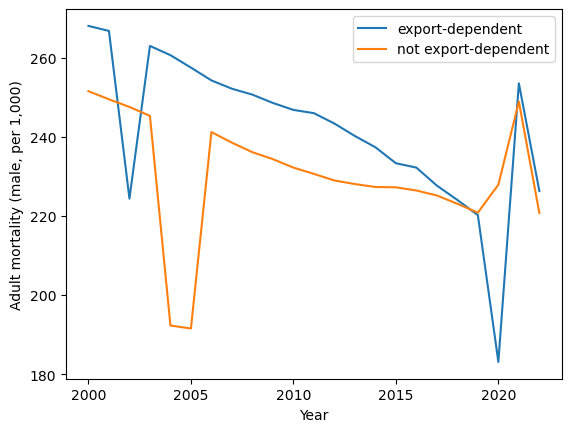

In [6]:
import matplotlib.pyplot as plt

tmp = panel.dropna(subset=["adult_mortality_male", "ag_export_share"]).copy()
tmp["group"] = tmp["export_dependent"].map({True: "export-dependent", False: "not export-dependent"})

trend = tmp.groupby(["year", "group"])["adult_mortality_male"].mean().reset_index()

for g in trend["group"].unique():
    sub = trend[trend["group"] == g]
    plt.plot(sub["year"], sub["adult_mortality_male"], label=g)

plt.xlabel("Year")
plt.ylabel("Adult mortality (male, per 1,000)")
plt.legend()
plt.show()

In [7]:
!pytest -q


no tests ran in 0.01s
